# plot crested heatmap

Reading file data_prep/synthetic_enhancers/tfmodisco_cardiac_body_muscle/ISE_Slow_muscle_cell_0.5_Slow_muscle_cells_0.5_Fast_muscle_cells_0.5_Heart_0_Heart_field_0_Cardiac_muscle_1/hpf72:Cardiac muscle_modisco_results.h5
Reading file data_prep/synthetic_enhancers/tfmodisco_cardiac_body_muscle/ISE_Slow_muscle_cell_1_Slow_muscle_cells_1_Fast_muscle_cells_1_Heart_0_Heart_field_0_Cardiac_muscle_0.5/hpf72:Cardiac muscle_modisco_results.h5
Reading file data_prep/synthetic_enhancers/tfmodisco_cardiac_body_muscle/ISE_Slow_muscle_cell_1_Slow_muscle_cells_1_Fast_muscle_cells_1_Heart_0_Heart_field_0_Cardiac_muscle_0/hpf72:Cardiac muscle_modisco_results.h5
Reading file data_prep/synthetic_enhancers/tfmodisco_cardiac_body_muscle/ISE_Slow_muscle_cell_1_Slow_muscle_cells_1_Fast_muscle_cells_1_Heart_0_Heart_field_0_Cardiac_muscle_1/hpf72:Cardiac muscle_modisco_results.h5
Reading file data_prep/synthetic_enhancers/tfmodisco_cardiac_body_muscle/ISE_Slow_muscle_cell_0_Slow_muscle_cells_0_Fast_muscle_cell

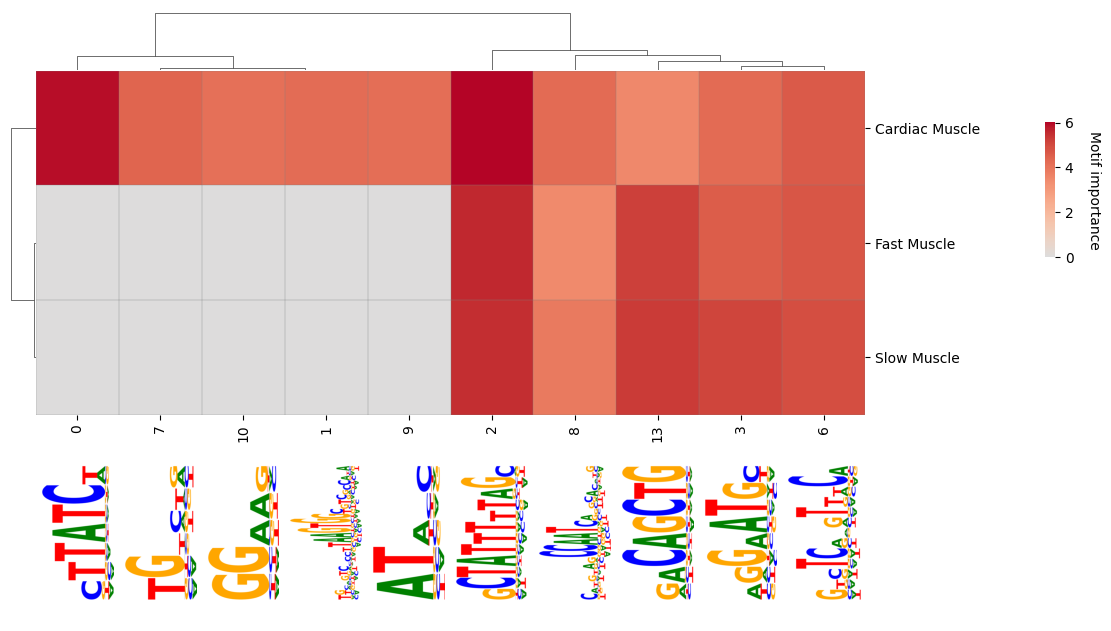

In [2]:
import sys
sys.path = [
'/data/projects/c20/sdewin/PhD/papers/CREsted_2025/figure_5',
 '',
 '/data/projects/c04/cbd-saerts/sdewin/software/miniforge3/envs/crested_1_3_torch/lib/python311.zip',
 '/data/projects/c04/cbd-saerts/sdewin/software/miniforge3/envs/crested_1_3_torch/lib/python3.11',
 '/data/projects/c04/cbd-saerts/sdewin/software/miniforge3/envs/crested_1_3_torch/lib/python3.11/lib-dynload',
 '/data/projects/c04/cbd-saerts/sdewin/software/miniforge3/envs/crested_1_3_torch/lib/python3.11/site-packages',
 '/data/projects/c04/cbd-saerts/sdewin/software/miniforge3/envs/crested_1_3_torch/lib/python3.11/site-packages/setuptools/_vendor'
]
import os
import crested

import matplotlib
%matplotlib inline

modisco_dir = "data_prep/synthetic_enhancers/tfmodisco_cardiac_body_muscle/"

matched_files = {
    "Cardiac Muscle": [
        os.path.join(modisco_dir, s, "hpf72:Cardiac muscle_modisco_results.h5")
        for s in os.listdir(modisco_dir)
    ],
    "Fast Muscle": [
        os.path.join(modisco_dir, s, "hpf72:Fast muscle cells_modisco_results.h5")
        for s in os.listdir(modisco_dir)
    ],
    "Slow Muscle": [
        os.path.join(modisco_dir, s, "hpf72:Slow muscle cells_modisco_results.h5")
        for s in os.listdir(modisco_dir)
    ],
}

all_patterns = crested.tl.modisco.process_patterns(
    matched_files=matched_files,
    sim_threshold=4.25,
    trim_ic_threshold=0.05,
    discard_ic_threshold=0.15,
    verbose=True
)
pattern_matrix = crested.tl.modisco.create_pattern_matrix(
    classes=list(matched_files.keys()),
    all_patterns=all_patterns,
    normalize=False,
    pattern_parameter="seqlet_count_log",
)
pat_seqs = crested.tl.modisco.generate_nucleotide_sequences(all_patterns)
crested.pl.patterns.clustermap_with_pwm_logos(
    pattern_matrix,
    list(matched_files.keys()),
    figsize=(10, 3),
    pattern_dict=all_patterns,
    grid=True,
    dendrogram_ratio=(0.03, 0.15),
    importance_threshold=4,
    logo_y_padding=0.2,
    logo_height_fraction=0.5
)

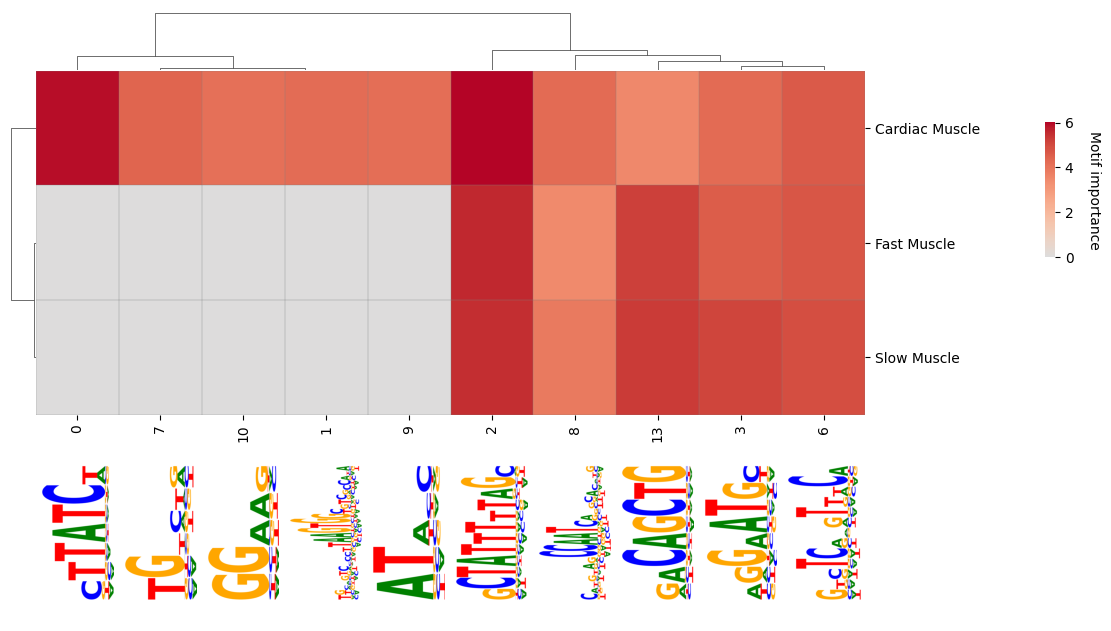

In [4]:
crested.pl.patterns.clustermap_with_pwm_logos(
    pattern_matrix,
    list(matched_files.keys()),
    figsize=(10, 3),
    pattern_dict=all_patterns,
    grid=True,
    dendrogram_ratio=(0.03, 0.15),
    importance_threshold=4,
    logo_y_padding=0.2,
    logo_height_fraction=0.5,
    save_path="cluster_hm.pdf"
)